In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_and_save(input_file="Real estate.csv", test_size=0.30, val_size=0.50):

    df = pd.read_csv(input_file)

    X = df.drop(columns=['Y house price of unit area'])
    y = df['Y house price of unit area']

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=42, shuffle=True
    )

    X_train.to_csv("X_train.csv", index=False)
    X_val.to_csv("X_val.csv", index=False)
    X_test.to_csv("X_test.csv", index=False)

    y_train.to_csv("y_train.csv", index=False)
    y_val.to_csv("y_val.csv", index=False)
    y_test.to_csv("y_test.csv", index=False)

    print("✔ File successfully split into 70% / 15% / 15%")

split_and_save()


✔ File successfully split into 70% / 15% / 15%


In [14]:
import pandas as pd

def handle_missing_from_files(
    X_train_path="X_train.csv",
    X_val_path="X_val.csv",
    X_test_path="X_test.csv",
    y_train_path="y_train.csv",
    y_val_path="y_val.csv",
    y_test_path="y_test.csv"
):
    """
    Handle missing values in existing train/val/test CSV files.
    Uses ONLY train statistics.
    """

    # Load X files
    X_train = pd.read_csv(X_train_path)
    X_val   = pd.read_csv(X_val_path)
    X_test  = pd.read_csv(X_test_path)

    # Load y files (pandas returns a DataFrame → convert to Series)
    y_train = pd.read_csv(y_train_path).iloc[:, 0]
    y_val   = pd.read_csv(y_val_path).iloc[:, 0]
    y_test  = pd.read_csv(y_test_path).iloc[:, 0]

    # Compute mean values from TRAIN only
    train_means_X = X_train.mean(numeric_only=True)
    train_mean_y = y_train.mean()

    # ---------- Clean X ----------
    def clean_X(df):
        df_clean = df.copy()
        for col in df_clean.columns:
            if df_clean[col].dtype in ["float64", "int64"]:
                df_clean[col].fillna(train_means_X[col], inplace=True)
            else:
                df_clean[col].fillna("", inplace=True)
        return df_clean

    # Clean y
    def clean_y(series):
        return series.fillna(train_mean_y)

    X_train_c = clean_X(X_train)
    X_val_c = clean_X(X_val)
    X_test_c = clean_X(X_test)

    y_train_c = clean_y(y_train)
    y_val_c = clean_y(y_val)
    y_test_c = clean_y(y_test)

    # Save cleaned files
    X_train_c.to_csv("X_train_cleaned.csv", index=False)
    X_val_c.to_csv("X_val_cleaned.csv", index=False)
    X_test_c.to_csv("X_test_cleaned.csv", index=False)

    y_train_c.to_csv("y_train_cleaned.csv", index=False)
    y_val_c.to_csv("y_val_cleaned.csv", index=False)
    y_test_c.to_csv("y_test_cleaned.csv", index=False)

    print("✔ Missing values processed and cleaned files saved successfully.")

    return X_train_c, X_val_c, X_test_c, y_train_c, y_val_c, y_test_c

    
handle_missing_from_files()


✔ Missing values processed and cleaned files saved successfully.


C:\Users\Raouf\AppData\Local\Temp\ipykernel_2244\1277464492.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(train_means_X[col], inplace=True)


(      No  X1 transaction date  X2 house age  \
 0      8             2013.417          20.3   
 1    195             2013.500          15.2   
 2     20             2012.667           1.5   
 3    177             2012.833          13.9   
 4    368             2012.833          15.0   
 ..   ...                  ...           ...   
 284   72             2013.083          35.5   
 285  107             2013.083          17.2   
 286  271             2013.333          10.8   
 287  349             2012.833           4.6   
 288  103             2013.083           1.1   
 
      X3 distance to the nearest MRT station  X4 number of convenience stores  \
 0                                 287.60250                                6   
 1                                3771.89500                                0   
 2                                  23.38284                                7   
 3                                4573.77900                                0   
 4               

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# ===== 1. Load your cleaned datasets =====
X_train = pd.read_csv("X_train_cleaned.csv")
X_val   = pd.read_csv("X_val_cleaned.csv")
X_test  = pd.read_csv("X_test_cleaned.csv")


# ===== 2. Scaling (ONLY on X_train) =====
scaler = StandardScaler()

# Fit فقط على train
X_train_scaled = scaler.fit_transform(X_train)

# Transform val & test بنفس scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ===== 3. Save scaled features =====

# Convert back to DataFrames
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_val_scaled   = pd.DataFrame(X_val_scaled,   columns=X_val.columns)
df_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns)

# Save scaled X files
df_train_scaled.to_csv("X_train_scaled.csv", index=False)
df_val_scaled.to_csv("X_val_scaled.csv", index=False)
df_test_scaled.to_csv("X_test_scaled.csv", index=False)


print("✔️ Scaling completed successfully!")
print("✔️ Files saved:")
print("   → X_train_scaled.csv")
print("   → X_val_scaled.csv")
print("   → X_test_scaled.csv")


# ===== 5. Save scaler for future prediction =====
joblib.dump(scaler, "scaler.pkl")

print("✔️ Scaler saved as scaler.pkl")


✔️ Scaling completed successfully!
✔️ Files saved:
   → X_train_scaled.csv
   → X_val_scaled.csv
   → X_test_scaled.csv
✔️ Scaler saved as scaler.pkl


===== Correlation Matrix =====
                                              No  X1 transaction date  \
No                                      1.000000            -0.004633   
X1 transaction date                    -0.004633             1.000000   
X2 house age                            0.041626             0.013485   
X3 distance to the nearest MRT station -0.062972             0.080023   
X4 number of convenience stores         0.013020            -0.028160   
X5 latitude                             0.001440             0.022414   
X6 longitude                            0.039021            -0.056164   
Target                                 -0.030232             0.081105   

                                        X2 house age  \
No                                          0.041626   
X1 transaction date                         0.013485   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.046619   
X4 number of convenience stores

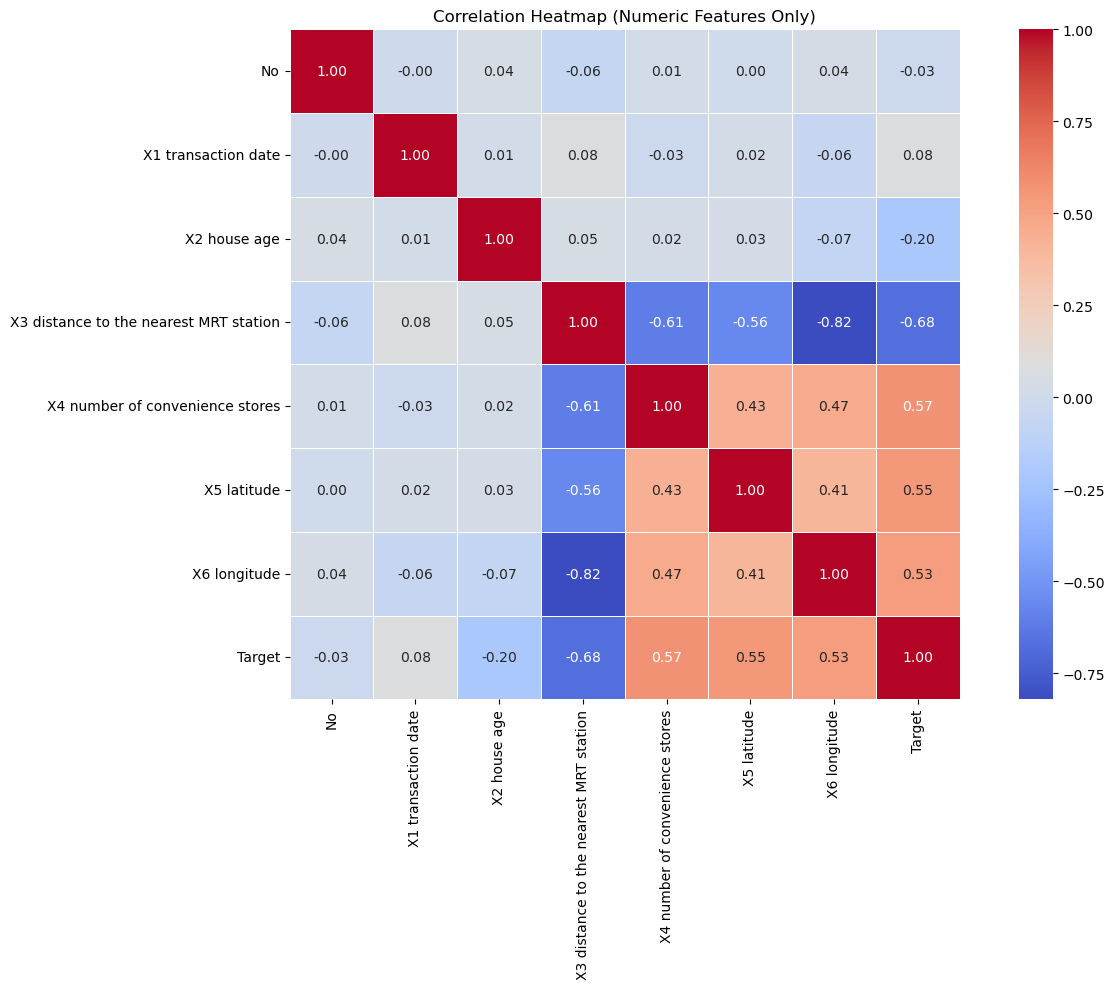


===== Correlation with Target =====
Target                                    1.000000
X4 number of convenience stores           0.574187
X5 latitude                               0.549832
X6 longitude                              0.526084
X1 transaction date                       0.081105
No                                       -0.030232
X2 house age                             -0.204978
X3 distance to the nearest MRT station   -0.678174
Name: Target, dtype: float64


C:\Users\Raouf\AppData\Local\Temp\ipykernel_2244\3945850157.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


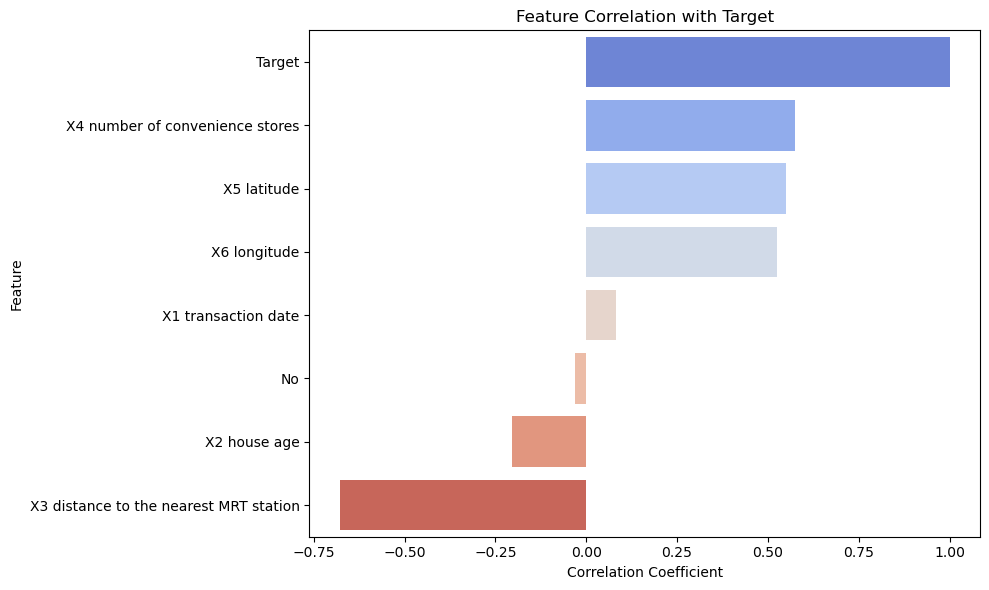

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================================================
# 1. Load scaled training data
# ======================================================
X_train = pd.read_csv("X_train_scaled.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]  # convertir en Series

# Merge features with target
df = X_train.copy()
df["Target"] = y_train

# ======================================================
# 2. Select ONLY numeric features
# ======================================================
numeric_df = df.select_dtypes(include=["int64", "float64", "float32", "int32"])

# ======================================================
# 3. Compute Correlation Matrix
# ======================================================
corr_matrix = numeric_df.corr()

print("===== Correlation Matrix =====")
print(corr_matrix)

# ======================================================
# 4. Correlation Heatmap (with values inside)
# ======================================================
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# ======================================================
# 5. Correlation with Target ONLY (sorted)
# ======================================================
corr_with_target = corr_matrix["Target"].sort_values(ascending=False)

print("\n===== Correlation with Target =====")
print(corr_with_target)

# ======================================================
# 6. Barplot for correlation with Target
# ======================================================
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="coolwarm"
)
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np

# ==========================================================
# FUNCTION : CORRELATION FILTERING (train only)
# ==========================================================
def correlation_filtering(df, target_col, weak_corr_threshold=0.05, high_corr_threshold=0.85):
    """
    Returns:
    - df_filtered      (train after filtering)
    - weak_features    (to drop everywhere)
    - high_corr_feats  (to drop everywhere)
    """

    df = df.copy()
    corr = df.corr()

    # -------- 1) Weak correlation with target --------
    weak_features = corr[target_col][corr[target_col].abs() < weak_corr_threshold].index.tolist()
    weak_features = [f for f in weak_features if f != target_col]

    df.drop(columns=weak_features, inplace=True)

    # -------- 2) Highly correlated features --------
    corr = df.corr()
    features = [c for c in df.columns if c != target_col]
    high_corr_feats = set()

    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            f1, f2 = features[i], features[j]

            if abs(corr.loc[f1, f2]) >= high_corr_threshold:
                # keep the most correlated with target
                if abs(corr.loc[f1, target_col]) < abs(corr.loc[f2, target_col]):
                    high_corr_feats.add(f1)
                else:
                    high_corr_feats.add(f2)

    df.drop(columns=list(high_corr_feats), inplace=True)

    return df, weak_features, list(high_corr_feats)


# ==========================================================
# MAIN SCRIPT — apply filtering to ALL files
# ==========================================================

# Load files
X_train = pd.read_csv("X_train_scaled.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]

X_val = pd.read_csv("X_val_scaled.csv")
y_val = pd.read_csv("y_val.csv").iloc[:, 0]

X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test.csv").iloc[:, 0]

# Merge X + target for train filtering
df_train = X_train.copy()
df_train["Target"] = y_train

# Apply filtering ONLY on training data
df_train_filtered, dropped_weak, dropped_high_corr = correlation_filtering(
    df_train, "Target", weak_corr_threshold=0.05, high_corr_threshold=0.85
)

# ==========================================================
#  APPLY DROPS TO VAL AND TEST
# ==========================================================

# Features to drop everywhere
features_to_drop = dropped_weak + dropped_high_corr

print("\nFeatures dropped everywhere:")
print(features_to_drop)

# Drop from all datasets
X_train_filtered = df_train_filtered.drop(columns=["Target"])
X_val_filtered = X_val.drop(columns=features_to_drop, errors="ignore")
X_test_filtered = X_test.drop(columns=features_to_drop, errors="ignore")

# ==========================================================
# SAVE FILES
# ==========================================================

X_train_filtered.to_csv("X_train_corr_filtered.csv", index=False)
y_train.to_csv("y_train_corr_filtered.csv", index=False)

X_val_filtered.to_csv("X_val_corr_filtered.csv", index=False)
y_val.to_csv("y_val_corr_filtered.csv", index=False)

X_test_filtered.to_csv("X_test_corr_filtered.csv", index=False)
y_test.to_csv("y_test_corr_filtered.csv", index=False)

print("\n✔ Successfully filtered correlations and applied same drops to VAL & TEST.")
print("✔ Files saved:")
print("   → X_train_corr_filtered.csv")
print("   → X_val_corr_filtered.csv")
print("   → X_test_corr_filtered.csv")



Features dropped everywhere:
['No']

✔ Successfully filtered correlations and applied same drops to VAL & TEST.
✔ Files saved:
   → X_train_corr_filtered.csv
   → X_val_corr_filtered.csv
   → X_test_corr_filtered.csv


===== Correlation Matrix =====
                                        X1 transaction date  X2 house age  \
X1 transaction date                                1.000000      0.013485   
X2 house age                                       0.013485      1.000000   
X3 distance to the nearest MRT station             0.080023      0.046619   
X4 number of convenience stores                   -0.028160      0.020733   
X5 latitude                                        0.022414      0.026494   
X6 longitude                                      -0.056164     -0.069503   
Target                                             0.081105     -0.204978   

                                        X3 distance to the nearest MRT station  \
X1 transaction date                                                   0.080023   
X2 house age                                                          0.046619   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience

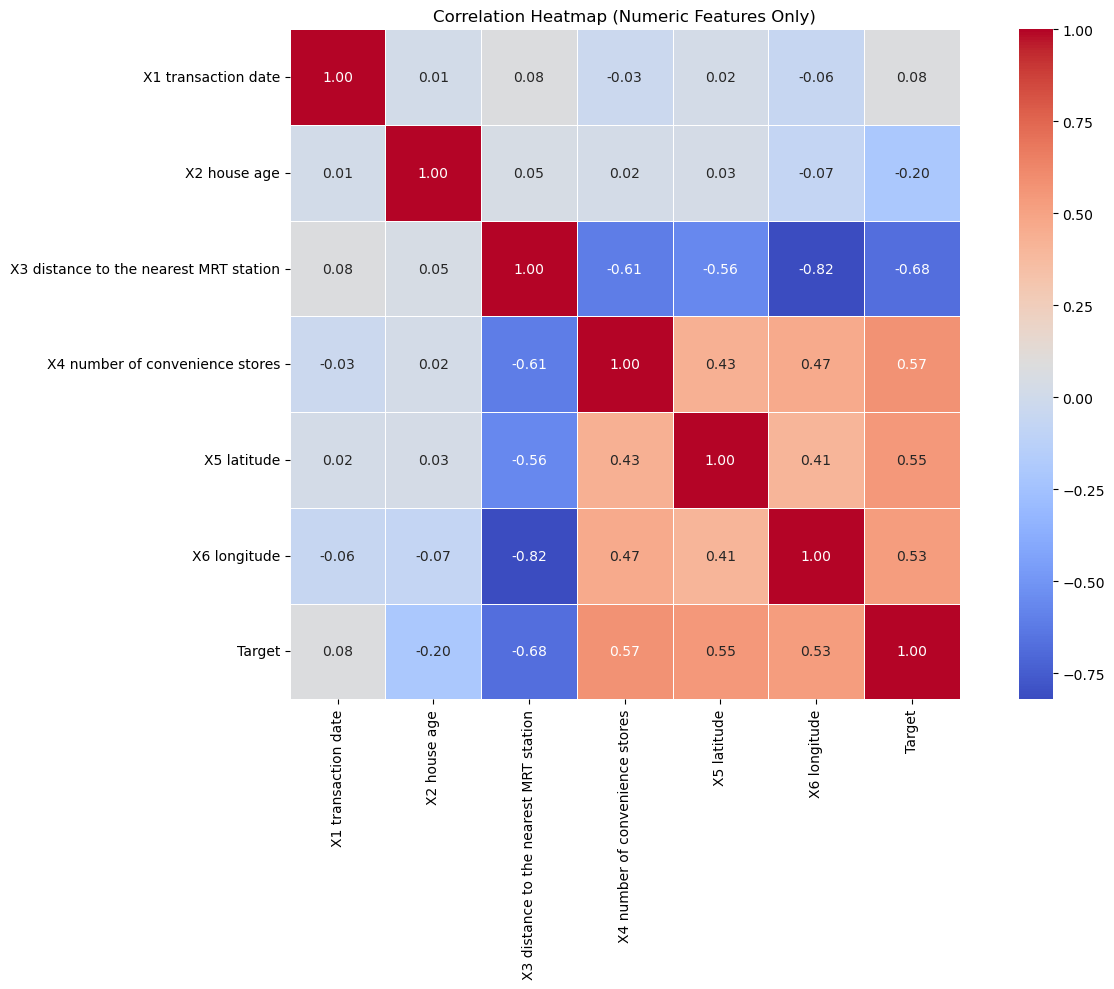


===== Correlation with Target =====
Target                                    1.000000
X4 number of convenience stores           0.574187
X5 latitude                               0.549832
X6 longitude                              0.526084
X1 transaction date                       0.081105
X2 house age                             -0.204978
X3 distance to the nearest MRT station   -0.678174
Name: Target, dtype: float64


C:\Users\Raouf\AppData\Local\Temp\ipykernel_2244\3821739668.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


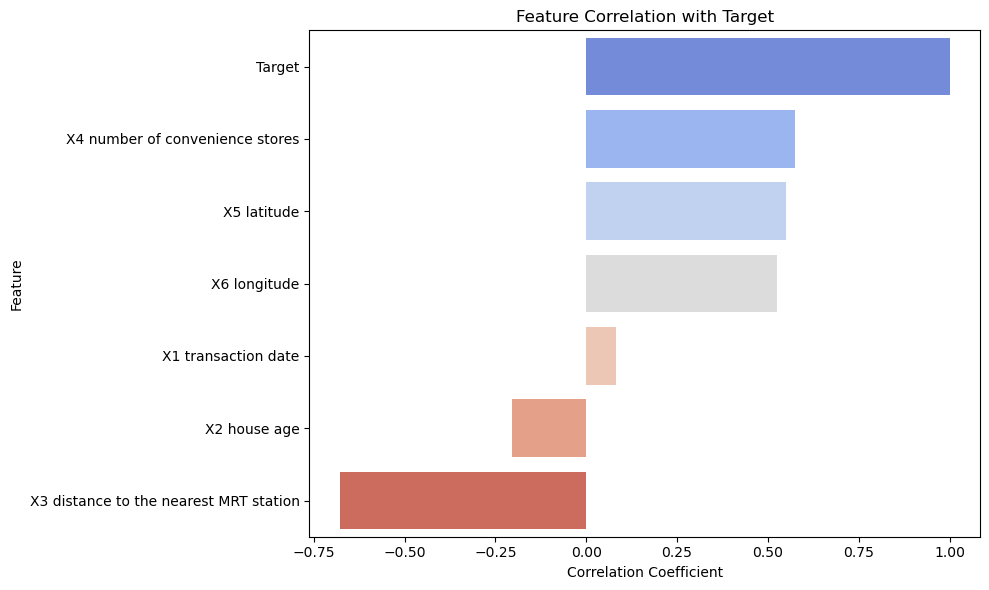

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================================================
# 1. Load scaled training data
# ======================================================
X_train = pd.read_csv("X_train_corr_filtered.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]  # convertir en Series

# Merge features with target
df = X_train.copy()
df["Target"] = y_train

# ======================================================
# 2. Select ONLY numeric features
# ======================================================
numeric_df = df.select_dtypes(include=["int64", "float64", "float32", "int32"])

# ======================================================
# 3. Compute Correlation Matrix
# ======================================================
corr_matrix = numeric_df.corr()

print("===== Correlation Matrix =====")
print(corr_matrix)

# ======================================================
# 4. Correlation Heatmap (with values inside)
# ======================================================
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# ======================================================
# 5. Correlation with Target ONLY (sorted)
# ======================================================
corr_with_target = corr_matrix["Target"].sort_values(ascending=False)

print("\n===== Correlation with Target =====")
print(corr_with_target)

# ======================================================
# 6. Barplot for correlation with Target
# ======================================================
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="coolwarm"
)
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



===== Random Forest Evaluation =====
MAE  : 3.7347
MSE  : 24.5709
RMSE : 4.9569
R² Score : 0.8527

✔ Random Forest model saved as random_forest_model.pkl
✔ Training & prediction completed successfully!


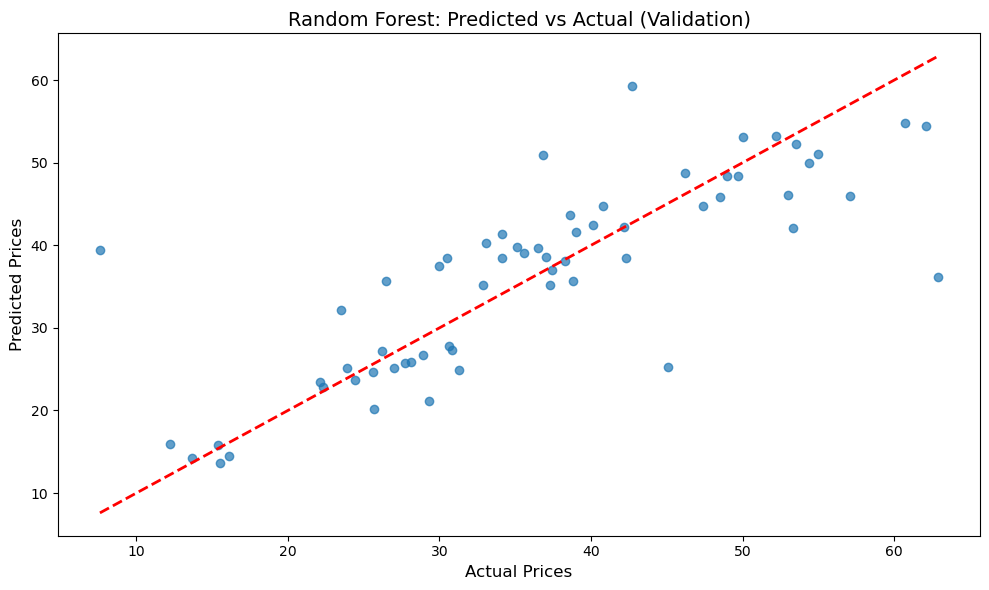

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# ======================================================
# 1. Load datasets (with new y file names)
# ======================================================
X_train = pd.read_csv("X_train_corr_filtered.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]    
X_val = pd.read_csv("X_val_corr_filtered.csv")
y_val = pd.read_csv("y_val.csv").iloc[:, 0]        

X_test = pd.read_csv("X_test_corr_filtered.csv")
y_test = pd.read_csv("y_test.csv").iloc[:, 0]      

# ======================================================
# 2. Train Random Forest Regressor
# ======================================================
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# ======================================================
# 3. Predict on test set
# ======================================================
y_pred_rf = rf.predict(X_test)

# ======================================================
# 4. Model Evaluation
# ======================================================
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("\n===== Random Forest Evaluation =====")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² Score : {r2:.4f}")

# ======================================================
# 5. Save model for future prediction
# ======================================================
joblib.dump(rf, "random_forest_model.pkl")

print("\n✔ Random Forest model saved as random_forest_model.pkl")
print("✔ Training & prediction completed successfully!")

import matplotlib.pyplot as plt

# ====================================================
# Scatter Plot: Predicted vs Actual (Validation)
# ====================================================

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(y_val, y_pred_val, alpha=0.7)

# Perfect prediction line (y = x)
min_val = min(min(y_val), min(y_pred_val))
max_val = max(max(y_val), max(y_pred_val))

plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

# Labels & title
plt.title("Random Forest: Predicted vs Actual (Validation)", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)

plt.tight_layout()
plt.show()



===== Best KNN Evaluation (Test Set) =====
MAE  : 4.3283
MSE  : 32.7074
RMSE : 5.7190
R²   : 0.8039


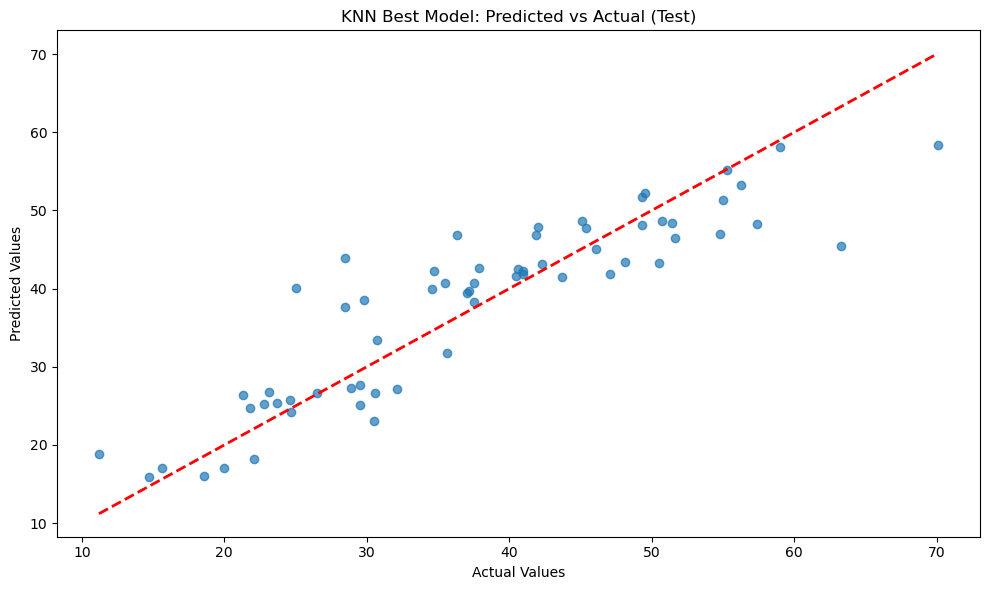

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ======================================================
# 1. Load datasets
# ======================================================
X_train = pd.read_csv("X_train_corr_filtered.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]

X_test = pd.read_csv("X_test_corr_filtered.csv")
y_test = pd.read_csv("y_test.csv").iloc[:, 0]

# ======================================================
# 2. Build KNN with your best parameters
# ======================================================
best_knn = KNeighborsRegressor(
    algorithm='auto',
    leaf_size=30,
    n_neighbors=20,
    p=1,
    weights='distance'
)

# ======================================================
# 3. Fit model
# ======================================================
best_knn.fit(X_train, y_train)

# ======================================================
# 4. Predict on test
# ======================================================
y_pred_knn = best_knn.predict(X_test)

# ======================================================
# 5. Evaluation Metrics
# ======================================================
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("===== Best KNN Evaluation (Test Set) =====")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# ======================================================
# 6. Plot Predicted vs Actual
# ======================================================
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_knn, alpha=0.7)

min_val = min(min(y_test), min(y_pred_knn))
max_val = max(max(y_test), max(y_pred_knn))

plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.title("KNN Best Model: Predicted vs Actual (Test)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


===== Final XGBoost Evaluation (Test Set) =====
MAE  : 3.6609
MSE  : 21.6083
RMSE : 4.6485
R²   : 0.8704


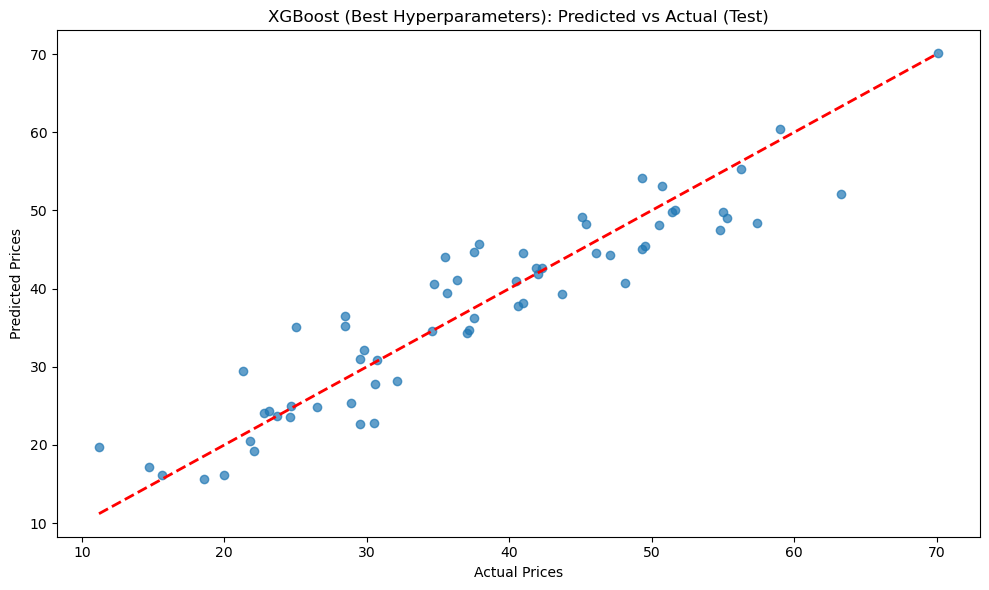


✔ Best XGBoost model saved as best_xgboost_model.pkl


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# ======================================================
# 1. Load data
# ======================================================
X_train = pd.read_csv("X_train_corr_filtered.csv")
y_train = pd.read_csv("y_train.csv").iloc[:, 0]

X_test = pd.read_csv("X_test_corr_filtered.csv")
y_test = pd.read_csv("y_test.csv").iloc[:, 0]

# ======================================================
# 2. Best parameters from Optuna
# ======================================================
best_params = {
    'max_depth': 7,
    'learning_rate': 0.11015614126673565,
    'n_estimators': 377,
    'min_child_weight': 10,
    'subsample': 0.5234826572144309,
    'reg_alpha': 1.4375999267432193,
    'reg_lambda': 3.8260340728570053,
    'gamma': 0.67349601565556,
    'colsample_bytree': 0.6830026415359598,
    'objective': 'reg:squarederror',
    'tree_method': 'hist'
}

# ======================================================
# 3. Train model
# ======================================================
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

# ======================================================
# 4. Predict on test
# ======================================================
y_pred = model.predict(X_test)

# ======================================================
# 5. Evaluation
# ======================================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("===== Final XGBoost Evaluation (Test Set) =====")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# ======================================================
# 6. Plot Predicted vs Actual
# ======================================================
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.7)

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)

plt.title("XGBoost (Best Hyperparameters): Predicted vs Actual (Test)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()

# ======================================================
# 7. Save best model
# ======================================================
joblib.dump(model, "best_xgboost_model.pkl")
print("\n✔ Best XGBoost model saved as best_xgboost_model.pkl")
